In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/archive (1)/train_dataset.csv')
df.head(n=5)



,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [ ]:
def reduce_mem_usage(train):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train.columns:
        col_type = train[col].dtype

        if col_type != object:
            c_min = train[col].min()
            c_max = train[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train[col] = train[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train[col] = train[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train[col] = train[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train[col] = train[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train[col] = train[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train[col] = train[col].astype(np.float32)
                else:
                    train[col] = train[col].astype(np.float64)
        else:
            train[col] = train[col].astype('object')

    end_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train

df_cleaned = reduce_mem_usage(df)
df_cleaned.info()

Memory usage of dataframe is 4.10 MB
Memory usage after optimization is: 0.57 MB
Decreased by 86.0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int8   
 1   Time                  31583 non-null  int8   
 2   Packet Loss Rate      31583 non-null  float16
 3   Packet delay          31583 non-null  int16  
 4   IoT                   31583 non-null  int8   
 5   LTE/5G                31583 non-null  int8   
 6   GBR                   31583 non-null  int8   
 7   Non-GBR               31583 non-null  int8   
 8   AR/VR/Gaming          31583 non-null  int8   
 9   Healthcare            31583 non-null  int8   
 10  Industry 4.0          31583 non-null  int8   
 11  IoT Devices           31583 non-null  int8   
 12  Public Safety         31583 non-null  int8   
 13  Smart City & Home    

Now let's split the data and select the features.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_cleaned[['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'Healthcare']]
y = df_cleaned['slice Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22108, 5)
(9475, 5)
(22108,)
(9475,)


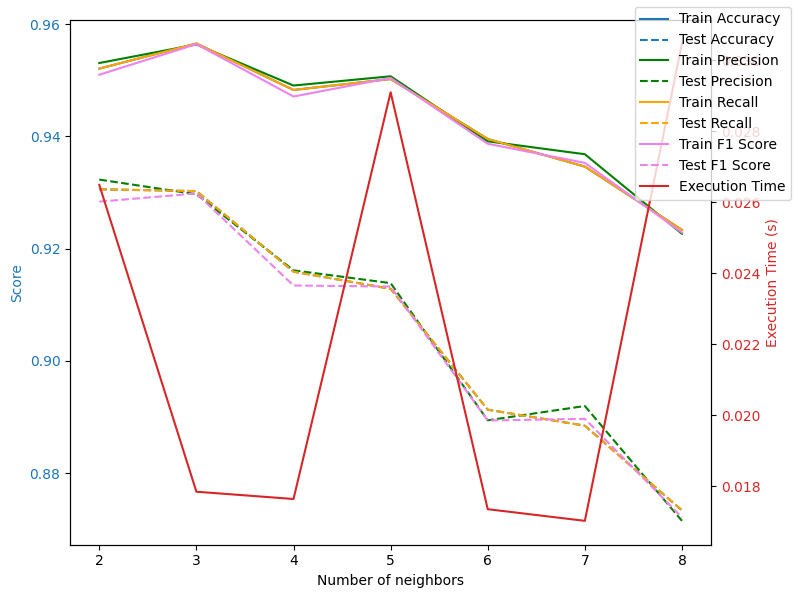

range(2, 9)


In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

model = KNeighborsClassifier()

params =  range(2,9)


train_accuracy_scores = []
test_accuracy_scores = []
train_precision_scores = []
test_precision_scores = []
train_recall_scores = []
test_recall_scores = []
train_f1_scores = []
test_f1_scores = []
exec_times = []

for n_neighbors in params:
    start_time = time.time()
    model.set_params(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    end_time = time.time()
    exec_time = end_time - start_time
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    train_precision_scores.append(train_precision)
    test_precision_scores.append(test_precision)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    exec_times.append(exec_time)

fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of neighbors')
ax1.set_ylabel('Score', color=color)
ax1.plot(params, train_accuracy_scores, color=color, label='Train Accuracy')
ax1.plot(params, test_accuracy_scores, color=color, linestyle='dashed', label='Test Accuracy')
ax1.plot(params, train_precision_scores, color='green', label='Train Precision')
ax1.plot(params, test_precision_scores, color='green', linestyle='dashed', label='Test Precision')
ax1.plot(params, train_recall_scores, color='orange', label='Train Recall')
ax1.plot(params, test_recall_scores, color='orange', linestyle='dashed', label='Test Recall')
ax1.plot(params, train_f1_scores, color='violet', label='Train F1 Score')
ax1.plot(params, test_f1_scores, color='violet', linestyle='dashed', label='Test F1 Score')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Execution Time (s)', color=color)
ax2.plot(params, exec_times, color=color, label='Execution Time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc="upper right")
plt.show()
print(params)

Accuracy of the KNN model (n_neighbors=3): 0.93


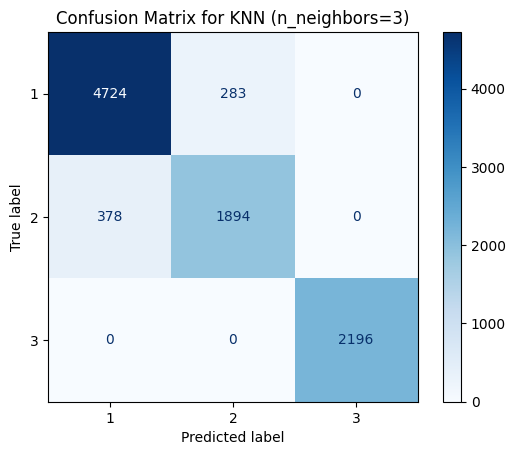

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
best_n_neighbors = 3
model.set_params(n_neighbors=best_n_neighbors)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the KNN model (n_neighbors={best_n_neighbors}): {accuracy:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for KNN (n_neighbors={best_n_neighbors})")
plt.show()


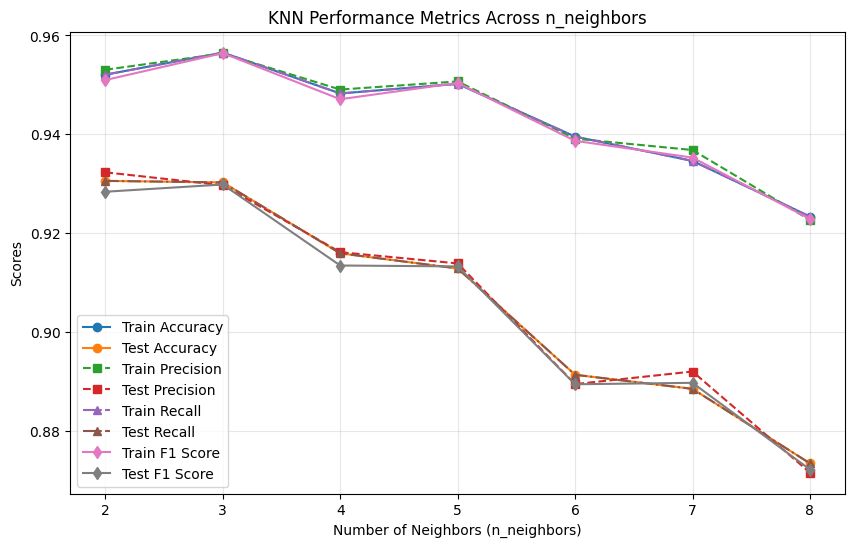

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(params, train_accuracy_scores, label="Train Accuracy", marker='o')
plt.plot(params, test_accuracy_scores, label="Test Accuracy", marker='o')
plt.plot(params, train_precision_scores, label="Train Precision", marker='s', linestyle='--')
plt.plot(params, test_precision_scores, label="Test Precision", marker='s', linestyle='--')
plt.plot(params, train_recall_scores, label="Train Recall", marker='^', linestyle='-.')
plt.plot(params, test_recall_scores, label="Test Recall", marker='^', linestyle='-.')
plt.plot(params, train_f1_scores, label="Train F1 Score", marker='d')
plt.plot(params, test_f1_scores, label="Test F1 Score", marker='d')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Scores")
plt.title("KNN Performance Metrics Across n_neighbors")
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import pandas as pd
import random

slicing_type_map = {1: 'eMBB', 2: 'URLLC', 3: 'mMTC'}

test_file_path = '/content/drive/MyDrive/archive (1)/test_dataset.csv'
test_data = pd.read_csv(test_file_path)

required_columns = [col for col in X_train.columns if col in test_data.columns]
if not required_columns:
    raise ValueError("Test data must contain at least one of the feature columns.")

random_sample = test_data.sample(n=5, random_state=42)

predictions = model.predict(random_sample[required_columns])

predicted_slicing_types = [slicing_type_map[pred] for pred in predictions]

random_sample['Predicted Slicing Type'] = predicted_slicing_types

print("\nRandomly Selected Rows with Predictions:\n")
print(random_sample.to_string(index=False))



Randomly Selected Rows with Predictions:

 LTE/5g Category  Time  Packet Loss Rate  Packet delay  IoT  LTE/5G  GBR  Non-GBR  AR/VR/Gaming  Healthcare  Industry 4.0  IoT Devices  Public Safety  Smart City & Home  Smart Transportation  Smartphone Predicted Slicing Type
              18    21          0.001000            50    1       0    1        0             0           0             1            0              0                  0                     0           0                   eMBB
              10     0          0.000001            10    1       0    0        1             0           0             0            0              1                  0                     0           0                   mMTC
               6    10          0.000001            10    1       0    0        1             0           0             0            0              0                  0                     1           0                   mMTC
              17     2          0.001000           15

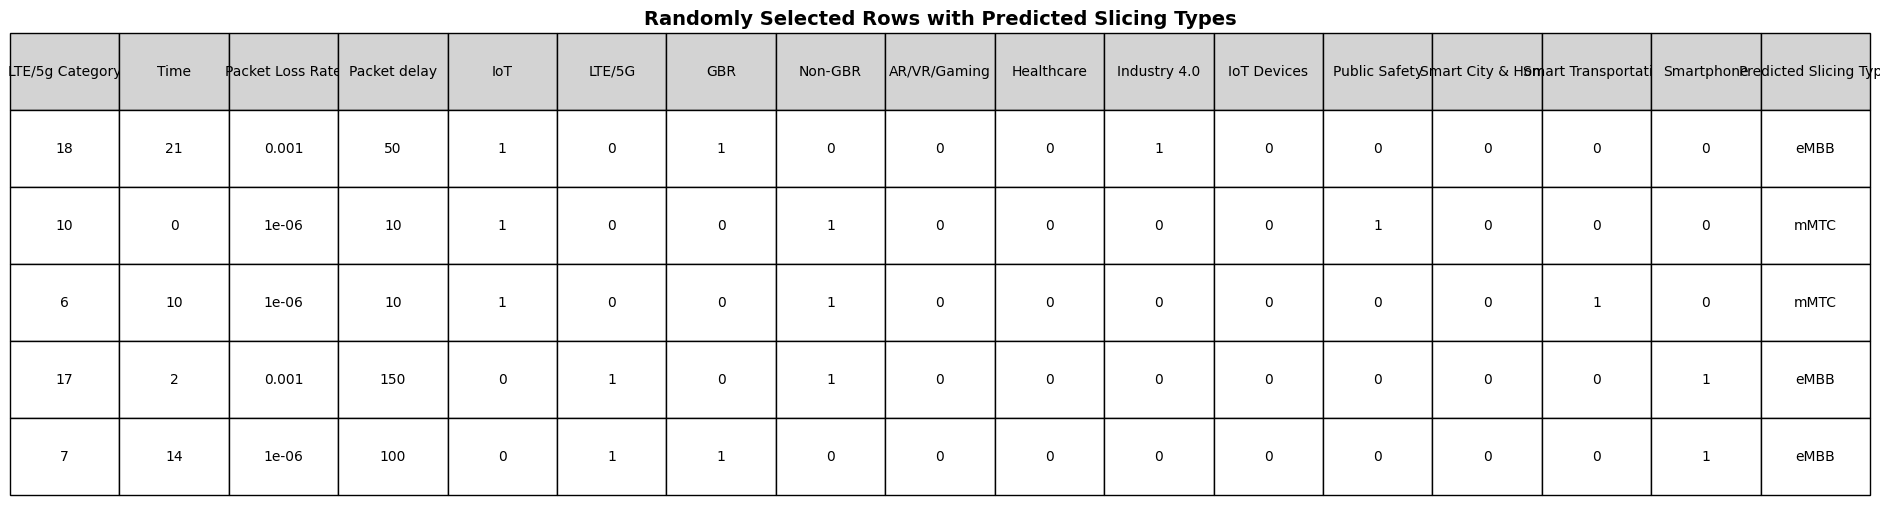

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Define the slicing type mapping
slicing_type_map = {1: 'eMBB', 2: 'URLLC', 3: 'mMTC'}

# Load the test CSV file
test_file_path = '/content/drive/MyDrive/archive (1)/test_dataset.csv'
test_data = pd.read_csv(test_file_path)

# Ensure the test data has the required columns
required_columns = [col for col in X_train.columns if col in test_data.columns]
if not required_columns:
    raise ValueError("Test data must contain at least one of the feature columns.")

# Select a random sample of rows from the test data
random_sample = test_data.sample(n=5, random_state=42)  # Adjust `n` for the number of rows

# Predict the slicing type for the selected rows
predictions = model.predict(random_sample[required_columns])

# Map predictions to slicing type names
random_sample['Predicted Slicing Type'] = [slicing_type_map[p] for p in predictions]

# Display the results in a structured table
fig, ax = plt.subplots(figsize=(24, 6))
ax.axis('tight')
ax.axis('off')

# Table dimensions
nrows, ncols = random_sample.shape
width, height = 1.0 / ncols, 1.0 / (nrows + 1)

table = Table(ax, bbox=[0, 0, 1, 1])

# Add the header row
for j, column in enumerate(random_sample.columns):
    table.add_cell(0, j, width, height, text=column, loc='center', facecolor='lightgray')

# Add the data rows
for i, row in enumerate(random_sample.values):
    for j, cell in enumerate(row):
        table.add_cell(i + 1, j, width, height, text=str(cell), loc='center', facecolor='white')

# Adjust the table layout
table.auto_set_font_size(False)
table.set_fontsize(10)
ax.add_table(table)
plt.title("Randomly Selected Rows with Predicted Slicing Types", fontsize=14, weight='bold')
plt.show()
